In [1]:
import sys
import os
import numpy as np

# add the project root to the Python path to allow for absolute imports
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
	sys.path.append(project_root)

from mlfromsc.algorithms.minisvm import MiniSVM

# 2D MinSVM

In [ ]:
X = np.array([
    [2, 3],
    [2.5, 2],
    [2, 4],
    [0, 0],
    [0, 1],
    [1, 0]
])
y = np.array([1, 1, 1, -1, -1, -1])

model = MiniSVM(X, y)
model.use_loss_history(True)
model.fit(learning_rate=0.1, epochs=50)
preds = model.predict(X)
print("Vorhersagen:", preds)

Epoch    1/10, Loss: 1.1111
Epoch    2/10, Loss: 1.0556
Epoch    3/10, Loss: 0.8025
Epoch    4/10, Loss: 0.4899
Epoch    5/10, Loss: 0.5903
Epoch    6/10, Loss: 0.4190
Epoch    7/10, Loss: 0.5130
Epoch    8/10, Loss: 0.3928
Epoch    9/10, Loss: 0.4737
Epoch   10/10, Loss: 0.3837
Vorhersagen: [ 1  1  1 -1 -1 -1]


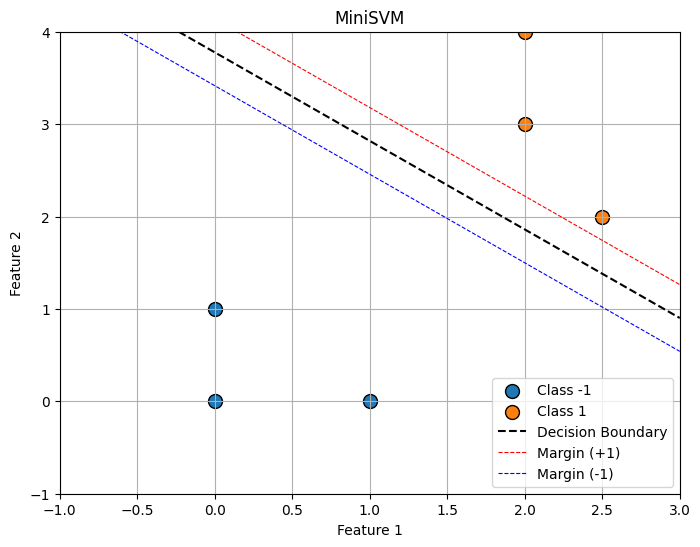

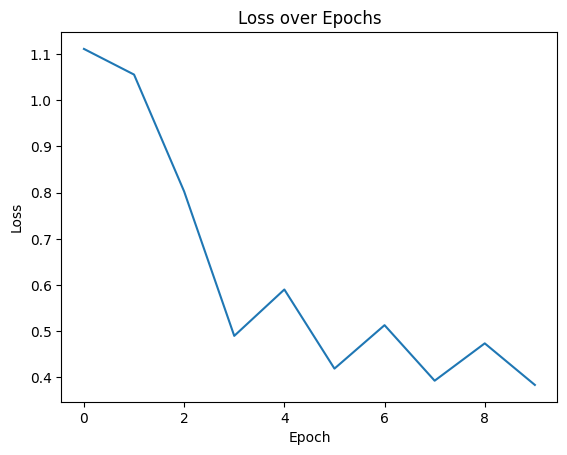

In [21]:
from matplotlib import pyplot as plt

def plot_svm_decision_boundary(X, y, model):
    def get_line(x):
        return (-model.w[0] * x - model.b) / model.w[1]

    plt.figure(figsize=(8, 6))

    for i, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label, 0], X[y == label, 1],
                    label=f"Class {label}", s=100, edgecolors='k')

    # decision boundary
    x0 = np.linspace(-1, 3, 100)
    x1 = get_line(x0)
    plt.plot(x0, x1, "k--", label="Decision Boundary")

    # margin labels
    margin = 1 / np.linalg.norm(model.w)
    x1_plus = get_line(x0) + margin
    x1_minus = get_line(x0) - margin
    plt.plot(x0, x1_plus, "r--", linewidth=0.8, label="Margin (+1)")
    plt.plot(x0, x1_minus, "b--", linewidth=0.8, label="Margin (-1)")

    plt.title("MiniSVM")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.xlim(-1, 3)
    plt.ylim(-1, 4)
    plt.show()

plot_svm_decision_boundary(X, y, model)

plt.plot(model.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.show()

# 3D MinSVM

Epoch    1/100, Loss: 0.4970
Epoch    2/100, Loss: 0.4657
Epoch    3/100, Loss: 0.4575
Epoch    4/100, Loss: 0.4380
Epoch    5/100, Loss: 0.4350
Epoch    6/100, Loss: 0.4220
Epoch    7/100, Loss: 0.4160
Epoch    8/100, Loss: 0.4089
Epoch    9/100, Loss: 0.4077
Epoch   10/100, Loss: 0.4012
Epoch   11/100, Loss: 0.3969
Epoch   12/100, Loss: 0.3938
Epoch   13/100, Loss: 0.3937
Epoch   14/100, Loss: 0.3877
Epoch   15/100, Loss: 0.3856
Epoch   16/100, Loss: 0.3844
Epoch   17/100, Loss: 0.3807
Epoch   18/100, Loss: 0.3787
Epoch   19/100, Loss: 0.3768
Epoch   20/100, Loss: 0.3749
Epoch   21/100, Loss: 0.3737
Epoch   22/100, Loss: 0.3715
Epoch   23/100, Loss: 0.3711
Epoch   24/100, Loss: 0.3684
Epoch   25/100, Loss: 0.3673
Epoch   26/100, Loss: 0.3658
Epoch   27/100, Loss: 0.3644
Epoch   28/100, Loss: 0.3631
Epoch   29/100, Loss: 0.3619
Epoch   30/100, Loss: 0.3608
Epoch   31/100, Loss: 0.3596
Epoch   32/100, Loss: 0.3585
Epoch   33/100, Loss: 0.3578
Epoch   34/100, Loss: 0.3568
Epoch   35/100

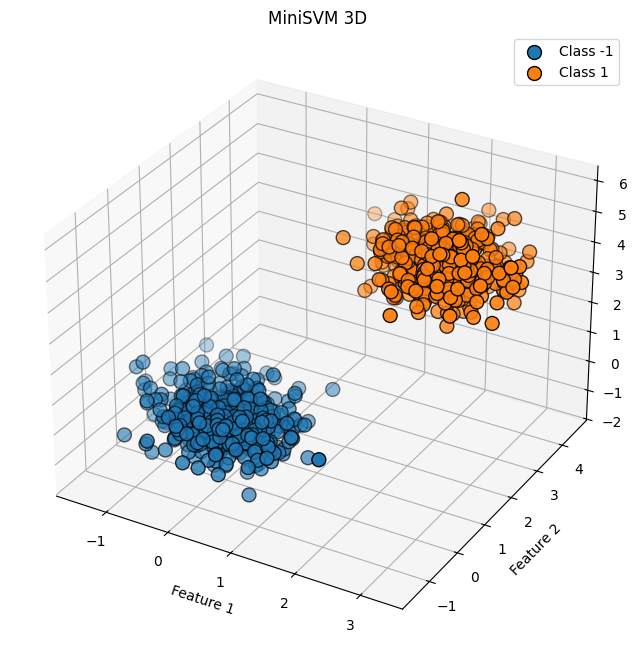

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# generate 3D data
np.random.seed(42)
n_points = 1000
# class 1
X1 = np.random.randn(n_points // 2, 3) * 0.5 + np.array([2, 3, 4])
# class -1
X2 = np.random.randn(n_points // 2, 3) * 0.5 + np.array([0, 0, 0])

X_3d = np.vstack([X1, X2])
y_3d = np.array([1] * (n_points // 2) + [-1] * (n_points // 2)) # target vector / labels

model_3d = MiniSVM(X_3d, y_3d)
model_3d.use_loss_history(True)
model_3d.fit(learning_rate=0.01, epochs=100)
preds_3d = model_3d.predict(X_3d)

# visualize the 3D data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y_3d):
    ax.scatter(X_3d[y_3d == label, 0], X_3d[y_3d == label, 1], X_3d[y_3d == label, 2],
               label=f"Class {label}", s=100, edgecolors='k')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("MiniSVM 3D")
plt.legend()
plt.show()

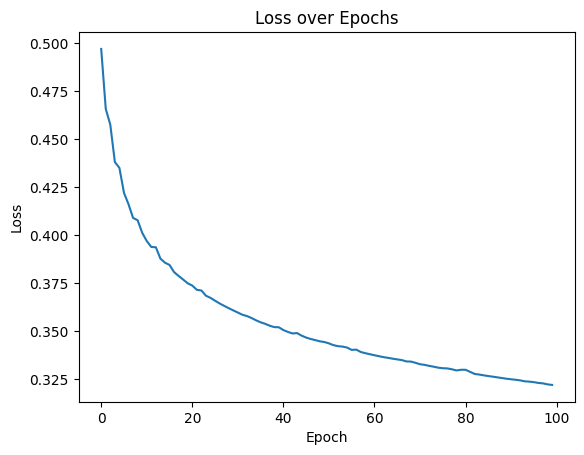

In [5]:
plt.plot(model_3d.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.show()